In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('bat_savant_22.csv')

#, index_col=0

In [4]:
pd.set_option('display.max_columns', None)
df.head(10)

,last_name,first_name,player_id,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,b_rbi,b_ball,b_foul,b_hit_popup,b_out_fly,b_out_ground,b_out_popup,b_swinging_strike,b_total_strike,b_total_swinging_strike,r_total_pickoff,b_walkoff,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,Unnamed: 35
0,Cruz Jr.,Nelson,443558,2022,41,448,507,105,79,16,0,10,119,49,23.5,9.7,0.234,0.337,0.312,0.649,64,661,356,0,50,136,16,324,1265,290,0,0,90.9,7.2,9.3,NaN
1,Blackmon,Charlie,453568,2022,35,530,577,140,96,22,6,16,109,32,18.9,5.5,0.264,0.419,0.312,0.731,78,651,414,1,73,153,25,230,1385,189,0,0,86.2,12.4,4.4,NaN
2,McCutchen,Andrew,457705,2022,35,515,580,122,80,25,0,17,124,57,21.4,9.8,0.237,0.384,0.316,0.700,69,871,410,0,80,129,24,257,1449,235,0,1,89.1,13.2,8.6,NaN
3,Turner,Justin,457759,2022,37,468,532,130,81,36,0,13,89,50,16.7,9.4,0.278,0.438,0.350,0.788,81,742,437,1,102,97,22,210,1349,182,0,0,89.5,18.4,8.0,NaN
4,Andrus,Elvis,462101,2022,33,535,577,133,84,32,0,17,92,39,15.9,6.8,0.249,0.404,0.303,0.707,58,761,361,0,75,163,38,220,1443,194,1,0,87.9,11.9,4.5,NaN
5,Santana,Carlos,467793,2022,36,431,506,87,50,18,0,19,88,71,17.4,14.0,0.202,0.376,0.316,0.692,60,772,347,0,71,114,33,188,1247,168,0,1,90.7,15.4,9.3,NaN
6,Gurriel,Yuli,493329,2022,38,545,584,132,84,40,0,8,73,30,12.5,5.1,0.242,0.360,0.288,0.647,53,643,405,1,104,145,46,147,1425,121,0,0,88.2,14.6,1.9,NaN
7,Rojas,Miguel,500743,2022,33,471,507,111,84,19,2,6,61,26,12.0,5.1,0.236,0.323,0.282,0.605,36,578,315,2,70,158,25,135,1195,123,2,0,86.1,10.1,1.9,NaN
8,Escobar,Eduardo,500871,2022,33,495,542,119,69,26,4,20,129,40,23.8,7.4,0.240,0.430,0.295,0.726,69,655,420,1,92,90,34,303,1398,249,0,2,88.3,20.6,9.4,NaN
9,Pham,Tommy,502054,2022,34,554,622,131,90,23,1,17,167,56,26.8,9.0,0.236,0.374,0.312,0.686,63,870,385,0,70,140,18,273,1572,234,1,1,92.2,7.7,7.9,NaN


In [5]:
df.loc[:,' first_name']


0         Nelson
1        Charlie
2         Andrew
3         Justin
4          Elvis
         ...    
125     Ha-Seong
126        Julio
127        Bobby
128       Steven
129       Andrew
Name:  first_name, Length: 130, dtype: object

In [6]:
df.columns = df.columns.str.strip()

In [7]:
df.loc[:,'first_name']

0         Nelson
1        Charlie
2         Andrew
3         Justin
4          Elvis
         ...    
125     Ha-Seong
126        Julio
127        Bobby
128       Steven
129       Andrew
Name: first_name, Length: 130, dtype: object

In [8]:
df_hittaz = df.query('last_name == "Freeman" or last_name == "Olson" or last_name == "Acuna Jr."')

In [9]:
df.query('last_name == "Acuna Jr."')

,last_name,first_name,player_id,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,b_rbi,b_ball,b_foul,b_hit_popup,b_out_fly,b_out_ground,b_out_popup,b_swinging_strike,b_total_strike,b_total_swinging_strike,r_total_pickoff,b_walkoff,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,Unnamed: 35
94,Acuna Jr.,Ronald,660670,2022,24,467,533,124,85,24,0,15,126,53,23.6,9.9,0.266,0.413,0.351,0.764,50,776,433,0,60,120,22,258,1335,226,1,0,91.2,10.8,12.8,NaN


<AxesSubplot:xlabel='b_ab', ylabel='b_total_pa'>

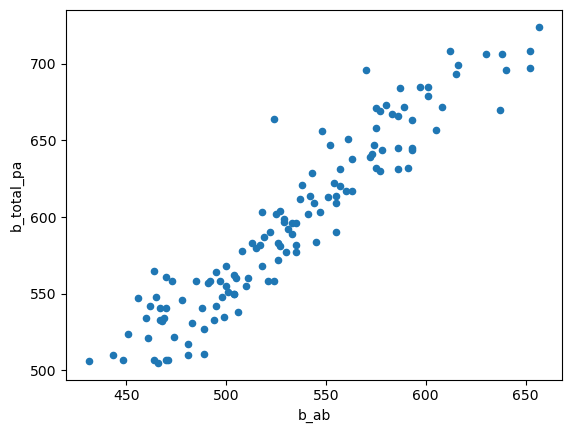

In [10]:
df.plot(kind = 'scatter', x = 'b_ab', y = 'b_total_pa')

In [11]:
df.corr(method ='pearson')

,player_id,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,b_rbi,b_ball,b_foul,b_hit_popup,b_out_fly,b_out_ground,b_out_popup,b_swinging_strike,b_total_strike,b_total_swinging_strike,r_total_pickoff,b_walkoff,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,Unnamed: 35
player_id,1.000000,NaN,-0.886340,0.182784,0.170175,0.166790,0.144268,0.014983,0.219070,0.061064,0.075114,0.015343,0.011702,-0.026948,0.109882,0.085501,0.073780,0.090276,0.043502,0.071121,0.120337,0.032737,-0.011580,0.132447,-0.017868,0.014713,0.136973,-0.002232,0.200032,0.015508,0.138846,-0.138675,0.058779,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_age,-0.886340,NaN,1.000000,-0.192520,-0.165697,-0.194766,-0.165059,0.020187,-0.242451,-0.108561,-0.044550,0.011108,0.012741,0.060267,-0.140835,-0.138083,-0.070943,-0.127148,-0.065497,-0.047632,-0.118856,0.050126,0.011005,-0.158955,0.021901,0.001015,-0.119986,0.016438,-0.235366,-0.044763,-0.117399,0.145461,-0.065220,NaN
b_ab,0.182784,NaN,-0.192520,1.000000,0.943048,0.796943,0.554703,0.553266,0.278257,0.350787,0.299868,0.141326,-0.035010,-0.126278,0.330673,0.345309,0.159640,0.312151,0.564338,0.472491,0.758111,-0.025102,0.381958,0.421732,0.253316,0.357867,0.874541,0.329657,0.187554,0.083943,0.184088,-0.012852,0.112644,NaN
b_total_pa,0.170175,NaN,-0.165697,0.943048,1.000000,0.749623,0.464853,0.534216,0.198380,0.444401,0.306119,0.448661,-0.048734,0.192028,0.306754,0.417016,0.360365,0.441049,0.614724,0.699519,0.751297,-0.041369,0.411022,0.352382,0.241775,0.305935,0.915796,0.287870,0.105597,0.113933,0.278932,0.055766,0.221680,NaN
b_total_hits,0.166790,NaN,-0.194766,0.796943,0.749623,1.000000,0.831744,0.623548,0.202224,0.253549,-0.005215,0.100981,-0.288456,-0.116574,0.830320,0.553959,0.570512,0.620893,0.533403,0.310495,0.617354,-0.059125,0.206524,0.439266,0.015621,0.148090,0.636947,0.124643,0.165833,0.068922,0.201013,-0.206404,0.051104,NaN
b_single,0.144268,NaN,-0.165059,0.554703,0.464853,0.831744,1.000000,0.300991,0.244839,-0.250876,-0.300228,-0.110856,-0.494809,-0.255216,0.789112,0.089056,0.447597,0.236296,0.087612,0.055620,0.387791,-0.059500,0.063789,0.624604,-0.183041,-0.143191,0.365169,-0.161626,0.196372,-0.052570,-0.118147,-0.489487,-0.362667,NaN
b_double,0.014983,NaN,0.020187,0.553266,0.534216,0.623548,0.300991,1.000000,-0.077053,0.174380,0.047620,0.126249,-0.139371,-0.020619,0.461903,0.430503,0.339545,0.442633,0.418401,0.279743,0.496947,0.135561,0.263961,0.123200,0.233519,0.163058,0.476217,0.139847,0.035467,-0.057337,0.194771,0.090741,0.062384,NaN
b_triple,0.219070,NaN,-0.242451,0.278257,0.198380,0.202224,0.244839,-0.077053,1.000000,-0.136967,0.036919,-0.176571,-0.028535,-0.257042,0.073438,-0.049562,-0.108846,-0.078146,-0.039397,-0.023704,0.150370,0.002945,0.077637,0.207807,0.009824,0.007821,0.199704,-0.018555,0.212245,-0.017613,-0.231505,-0.150424,-0.208829,NaN
b_home_run,0.061064,NaN,-0.108561,0.350787,0.444401,0.253549,-0.250876,0.174380,-0.136967,1.000000,0.537294,0.401634,0.393874,0.289728,0.076054,0.842298,0.253612,0.708793,0.802876,0.431577,0.316522,-0.125287,0.158231,-0.311681,0.223603,0.514963,0.413806,0.517509,-0.057860,0.314763,0.615662,0.433319,0.832526,NaN


<AxesSubplot:xlabel='b_home_run', ylabel='launch_angle_avg'>

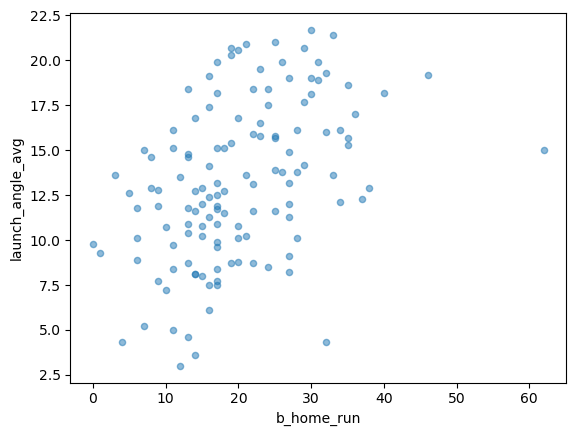

In [12]:
df.plot(kind = "scatter", x = 'b_home_run', y = 'launch_angle_avg', alpha = .5)

<AxesSubplot:xlabel='b_home_run', ylabel='barrel_batted_rate'>

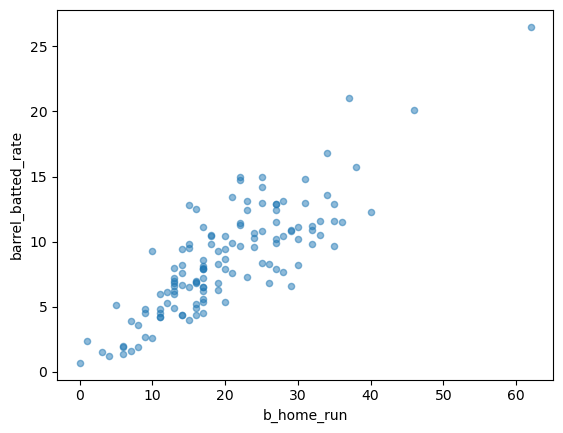

In [13]:
df.plot(kind = "scatter", x = 'b_home_run', y = 'barrel_batted_rate', alpha = .5)

In [14]:
df_bash = df.query('b_home_run >= 35')
df_bash

,last_name,first_name,player_id,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,b_rbi,b_ball,b_foul,b_hit_popup,b_out_fly,b_out_ground,b_out_popup,b_swinging_strike,b_total_strike,b_total_swinging_strike,r_total_pickoff,b_walkoff,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,Unnamed: 35
11,Goldschmidt,Paul,502671,2022,34,561,651,178,102,41,0,35,141,79,21.7,12.1,0.317,0.578,0.402,0.980,115,966,400,2,74,119,30,302,1656,259,0,1,90.8,15.7,11.6,NaN
35,Walker,Christian,572233,2022,31,583,667,141,78,25,2,36,131,69,19.6,10.3,0.242,0.477,0.327,0.804,94,914,398,0,96,138,38,280,1540,251,1,1,90.0,17.0,11.5,NaN
40,Judge,Aaron,592450,2022,30,570,696,177,87,28,0,62,175,111,25.1,15.9,0.311,0.686,0.422,1.108,131,1079,469,0,76,111,10,370,1730,341,1,4,95.9,15.0,26.5,NaN
51,Betts,Mookie,605141,2022,29,572,639,154,76,40,3,35,104,55,16.3,8.6,0.269,0.533,0.340,0.873,82,883,423,1,123,127,35,177,1491,154,1,2,90.5,18.6,9.7,NaN
67,Alonso,Pete,624413,2022,27,597,685,162,95,27,0,40,128,67,18.7,9.8,0.271,0.518,0.352,0.869,131,846,470,1,99,133,46,302,1586,251,0,2,89.8,18.2,12.3,NaN
74,Tellez,Rowdy,642133,2022,27,529,599,116,58,23,0,35,121,62,20.2,10.4,0.219,0.461,0.306,0.767,89,833,379,0,78,141,38,248,1504,206,1,0,91.1,15.3,12.9,NaN
90,Schwarber,Kyle,656941,2022,29,577,669,126,56,21,3,46,200,86,29.9,12.9,0.218,0.504,0.323,0.827,94,1091,442,0,76,109,43,339,1726,300,0,0,93.3,19.2,20.1,NaN
97,Riley,Austin,663586,2022,25,615,693,168,89,39,2,38,168,57,24.2,8.2,0.273,0.528,0.349,0.878,93,864,534,0,79,136,27,376,1685,332,0,2,92.5,12.9,15.7,NaN
123,Alvarez,Yordan,670541,2022,25,470,561,144,76,29,2,37,106,78,18.9,13.9,0.306,0.613,0.406,1.019,97,836,346,0,69,120,10,219,1300,180,0,2,95.2,12.3,21.0,NaN


In [15]:
df_sort_bash = df_bash[["last_name", "b_home_run","b_total_hits", "b_total_pa"]]
df_sort_bash.sort_values(by = ["b_home_run"])

,last_name,b_home_run,b_total_hits,b_total_pa
11,Goldschmidt,35,178,651
51,Betts,35,154,639
74,Tellez,35,116,599
35,Walker,36,141,667
123,Alvarez,37,144,561
97,Riley,38,168,693
67,Alonso,40,162,685
90,Schwarber,46,126,669
40,Judge,62,177,696


In [16]:
df.query('last_name == "Trout"')

,last_name,first_name,player_id,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,b_rbi,b_ball,b_foul,b_hit_popup,b_out_fly,b_out_ground,b_out_popup,b_swinging_strike,b_total_strike,b_total_swinging_strike,r_total_pickoff,b_walkoff,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,Unnamed: 35


In [17]:
np.mean(df['b_home_run'])

20.076923076923077

In [18]:
np.std(df['b_home_run'])

9.599371281187267

In [19]:
np.mean(df['b_total_pa'])

597.4461538461538

In [20]:
df.describe()

,player_id,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,b_rbi,b_ball,b_foul,b_hit_popup,b_out_fly,b_out_ground,b_out_popup,b_swinging_strike,b_total_strike,b_total_swinging_strike,r_total_pickoff,b_walkoff,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,Unnamed: 35
count,130.000000,130.0,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,0.0
mean,607829.930769,2022.0,28.707692,533.169231,597.446154,138.184615,87.684615,28.338462,2.084615,20.076923,118.892308,52.369231,19.928462,8.710769,0.258277,0.431100,0.329323,0.760346,71.838462,785.061538,418.500000,0.584615,80.415385,133.346154,28.992308,259.500000,1476.661538,224.946154,0.807692,0.600000,89.330769,13.225385,8.613077,NaN
std,61551.798138,0.0,3.542535,51.598350,57.712340,23.088231,19.010823,7.139316,1.884390,9.636506,32.668940,18.523456,5.235023,2.810645,0.028286,0.060683,0.032070,0.083691,19.549501,129.583696,59.872248,0.795185,18.250532,25.204193,11.760858,77.584288,150.658017,70.813141,0.932581,0.840819,2.097501,4.399688,4.167247,NaN
min,443558.000000,2022.0,21.000000,431.000000,505.000000,83.000000,44.000000,15.000000,0.000000,0.000000,43.000000,17.000000,7.100000,3.300000,0.184000,0.273000,0.239000,0.561000,32.000000,507.000000,290.000000,0.000000,47.000000,76.000000,6.000000,73.000000,1181.000000,56.000000,0.000000,0.000000,84.400000,3.000000,0.700000,NaN
25%,571987.750000,2022.0,26.000000,494.250000,550.250000,123.250000,76.250000,23.000000,1.000000,14.000000,97.000000,40.000000,16.425000,6.800000,0.239250,0.392250,0.308000,0.710000,58.000000,702.250000,376.250000,0.000000,69.000000,114.250000,21.000000,206.250000,1362.000000,176.000000,0.000000,0.000000,87.800000,10.100000,6.000000,NaN
50%,622163.500000,2022.0,29.000000,529.000000,590.000000,136.500000,87.000000,27.000000,2.000000,18.000000,119.000000,52.000000,19.200000,8.650000,0.257500,0.427000,0.326000,0.756500,69.000000,779.500000,411.500000,0.000000,77.000000,131.500000,27.000000,257.500000,1448.000000,226.000000,1.000000,0.000000,89.400000,12.900000,8.200000,NaN
75%,663574.000000,2022.0,31.000000,573.750000,644.000000,151.750000,98.000000,32.000000,3.000000,27.000000,141.000000,61.750000,24.100000,10.275000,0.275500,0.465750,0.348500,0.807000,83.750000,867.000000,465.500000,1.000000,92.000000,150.500000,35.000000,313.750000,1586.750000,274.500000,1.000000,1.000000,90.650000,16.100000,11.050000,NaN
max,683734.000000,2022.0,41.000000,657.000000,724.000000,199.000000,134.000000,47.000000,9.000000,62.000000,200.000000,135.000000,34.300000,20.300000,0.326000,0.686000,0.422000,1.108000,131.000000,1151.000000,587.000000,4.000000,147.000000,208.000000,74.000000,455.000000,1806.000000,418.000000,3.000000,4.000000,95.900000,21.700000,26.500000,NaN


In [21]:
df.query('last_name == "Swanson"')

,last_name,first_name,player_id,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,b_rbi,b_ball,b_foul,b_hit_popup,b_out_fly,b_out_ground,b_out_popup,b_swinging_strike,b_total_strike,b_total_swinging_strike,r_total_pickoff,b_walkoff,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,Unnamed: 35
60,Swanson,Dansby,621020,2022,28,640,696,177,119,32,1,25,182,49,26.1,7.0,0.277,0.447,0.329,0.776,96,908,480,1,94,123,24,417,1769,376,1,0,90.2,15.7,10.8,NaN


In [22]:
df_tripler = df.query('b_triple > 1')

In [23]:
np.max(df_tripler['b_triple'])

9

In [28]:
df_tripler_smash = df_tripler.nlargest(3, 'b_triple')

In [29]:
df_tripler_smash.iloc[0,2]

642708

In [30]:
df_tripler_smash

,last_name,first_name,player_id,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,b_rbi,b_ball,b_foul,b_hit_popup,b_out_fly,b_out_ground,b_out_popup,b_swinging_strike,b_total_strike,b_total_swinging_strike,r_total_pickoff,b_walkoff,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,Unnamed: 35
75,Rosario,Amed,642708,2022,26,637,670,180,134,26,9,11,111,25,16.6,3.7,0.283,0.403,0.312,0.715,71,671,475,1,76,198,26,267,1677,228,0,2,88.4,5.0,4.5,NaN
54,Nimmo,Brandon,607043,2022,29,580,673,159,106,30,7,16,116,71,17.2,10.5,0.274,0.433,0.366,0.798,64,998,506,0,69,167,28,238,1722,206,0,0,89.4,6.1,7.0,NaN
65,Mateo,Jorge,622761,2022,27,494,533,109,64,25,7,13,147,27,27.6,5.1,0.221,0.379,0.265,0.643,50,572,371,0,68,104,31,330,1356,287,1,1,86.8,14.8,6.0,NaN


In [ ]:


class Rectangle(object):
        def __init__(self,width=2,height =3,color='r'):
                                  self.height=height
                                  self.width=width
                                  self.color=color
    def drawRectangle(self):
                       import matplotlib.pyplot as plt
                       plt.gca().add_patch(plt.Rectangle((0, 0),self.width, self.height ,fc=self.color))
                       plt.axis('scaled')
                       plt.show()